# House Price Prediction using Lasso and Ridge

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.


Determining the optimal value of lambda for ridge and lasso regression

The solution is divided into following section:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

## Step 1: Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing_df = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 1460 rows, 80 columns, null values present in the dataset
# dtypes: float64(3), int64(35), object(43)
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Check the head of the dataset
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Shape of the dataset
housing_df.shape

(1460, 81)

In [6]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##  Step 2: Data Cleaning

### Performing EDA to understand the variables

### Data Cleaning and Quality Check of the Data

In [7]:
# check for duplicate values
# There is no two identical rows present in the dataset
housing_df.duplicated().unique()

array([False])

In [8]:
# check for null values
pd.isnull(housing_df).sum().nlargest(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

#### Observation from the null check
    - There are missing values in the dataset
    - we need to remove the missing value column which has more than 80% threshold

In [9]:
# Filtering the column which has more than 80% missing values
col_to_drop = []
percent_missing = housing_df.isnull().sum() * 100 / len(housing_df)
df2 = pd.DataFrame({
    'col_name': housing_df.columns,
    'percent_missing': percent_missing
})

col_to_drop.extend(df2[df2['percent_missing'] > 80].col_name)

In [10]:
# Print the columns which needs to be dropped
col_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
# Drop the column which has 80% missing values
housing_df = housing_df.drop(col_to_drop,axis=1)

In [12]:
#Check the shape after dropping the column
housing_df.shape

(1460, 77)

In [13]:
# some of columns has more dominant values so dropping those which has 95% dominant values. 
col_to_drop = []
for col in housing_df.columns:
    value_count = housing_df[col].value_counts().nlargest(1).index[0]
    dom_per = (housing_df[col].value_counts()[value_count] / 1460)*100
    if dom_per > 98:
        col_to_drop.append(col)
col_to_drop

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'LowQualFinSF',
 '3SsnPorch',
 'PoolArea']

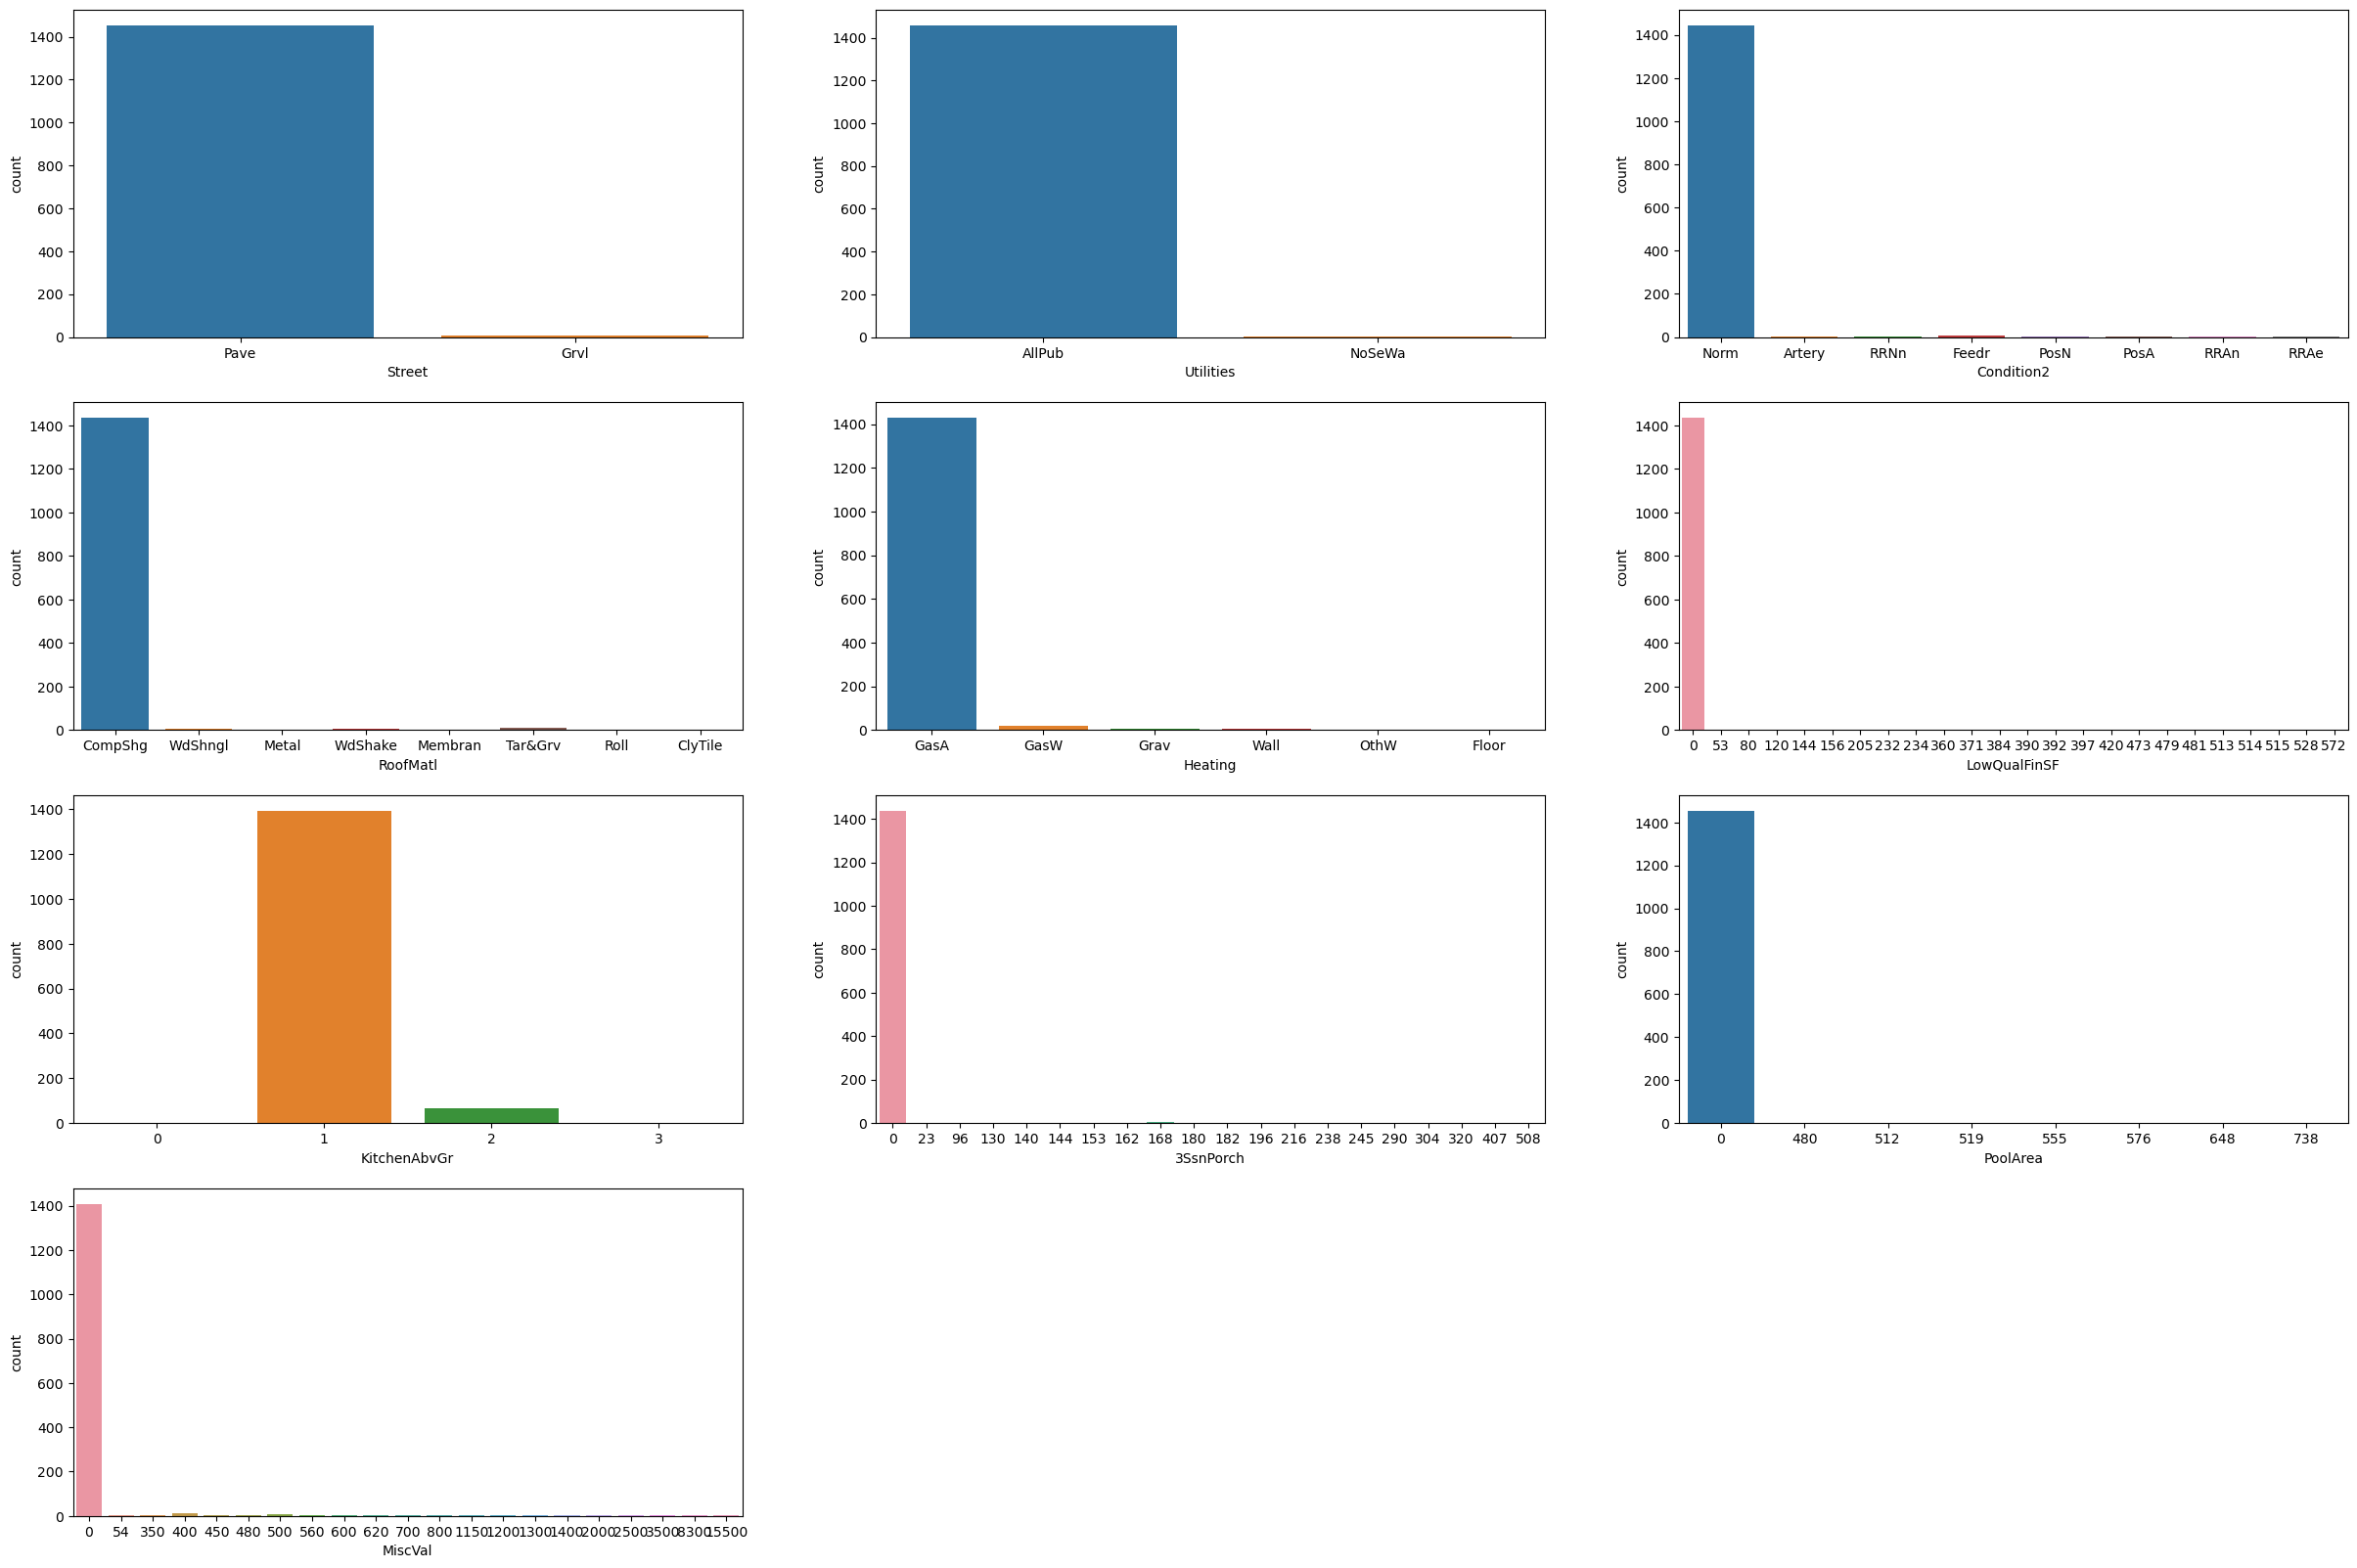

In [15]:
# Lets visualise above features. We can see that all the feature's one of the value is highly dominated to dropping
# those features
plt.figure(figsize=(30, 20))
plt.subplot(4,3,1)
sns.countplot(x = 'Street',data=housing_df)
plt.subplot(4,3,2)
sns.countplot(x = 'Utilities',data=housing_df)
plt.subplot(4,3,3)
sns.countplot(x = 'Condition2',data=housing_df)
plt.subplot(4,3,4)
sns.countplot(x = 'RoofMatl',data=housing_df)
plt.subplot(4,3,5)
sns.countplot(x = 'Heating',data=housing_df)
plt.subplot(4,3,6)
sns.countplot(x = 'LowQualFinSF',data=housing_df)
plt.subplot(4,3,7)
sns.countplot(x = 'KitchenAbvGr',data=housing_df)
plt.subplot(4,3,8)
sns.countplot(x = '3SsnPorch',data=housing_df)
plt.subplot(4,3,9)
sns.countplot(x = 'PoolArea',data=housing_df)
plt.subplot(4,3,10)
sns.countplot(x = 'MiscVal',data=housing_df)
plt.show()

In [16]:
# Dropping all the columns which has dominated percentage of values
housing_df.drop(col_to_drop,axis=1,inplace=True)

In [17]:
# checking missing counts in each column and fetching the top 15.
housing_df.isnull().sum().nlargest(15)

MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64

In [18]:
housing_df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [19]:
# MasVnrType has null value that means the house does not have Masonry veneer type. we will fill the 
# null value with No_MasVnr
housing_df['MasVnrType'].fillna("No", inplace = True)

In [20]:
# FireplaceQu has null value that means the house does not have Fireplace quality. we will fill the 
# null value with No_Fireplace
housing_df['FireplaceQu'].fillna("No", inplace = True)

In [21]:
# After imputing the checking the value counts of FireplaceQu
housing_df['FireplaceQu'].value_counts()

FireplaceQu
No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

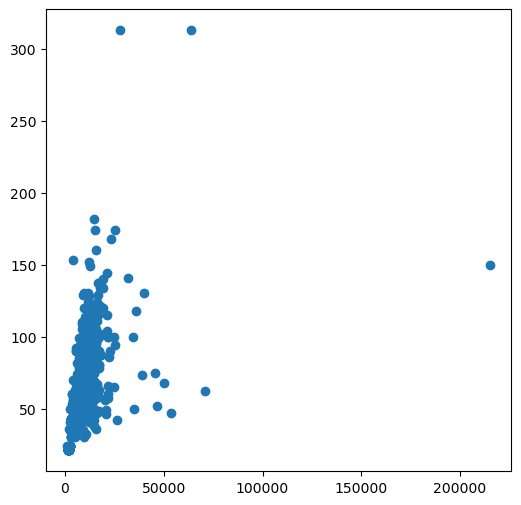

In [22]:
# Analysing lot related columns
plt.figure(figsize=[6,6])
plt.scatter(housing_df.LotArea,housing_df.LotFrontage)
plt.show()

#### Observation from Lot scatter plot
    - Most of the LotArea values are around 50 to 150. 
    - So Applying the median value would be best for imputation

In [23]:
# LotFrontage might be having some value but while collecting the sample the chances are there for missing.
# based on the above graph, filling it with median value as it numerical column 
housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median(), inplace = True)

In [24]:
# GarageType, GarageYrBlt, GarageFinish and GarageQual all are having same null values. 
# Instead of imputing all four column we can remove the rows
housing_df[(housing_df['GarageType'].isnull() & housing_df['GarageYrBlt'].isnull() &  housing_df['GarageFinish'].isnull() & housing_df['GarageQual'].isnull())].shape

(81, 70)

In [25]:
# removing the garage related null rows
housing_df = housing_df[-(housing_df['GarageType'].isnull() & housing_df['GarageYrBlt'].isnull() &  housing_df['GarageFinish'].isnull() & housing_df['GarageQual'].isnull())]

In [26]:
housing_df.shape

(1379, 70)

In [27]:
# Again checking null values of columns. Only 6 columns are having null values after imputation
housing_df.isnull().sum().nlargest(7)

BsmtExposure    31
BsmtFinType2    31
BsmtQual        30
BsmtCond        30
BsmtFinType1    30
MasVnrArea       8
Electrical       1
dtype: int64

In [28]:
# Combining BsmtExposure and BsmtFinType2 null check and removing the rows
housing_df[(housing_df['BsmtExposure'].isnull() & housing_df['BsmtFinType2'].isnull())].shape

(30, 70)

In [29]:
housing_df = housing_df[-(housing_df['BsmtExposure'].isnull() & housing_df['BsmtFinType2'].isnull())]

In [30]:
housing_df.shape

(1349, 70)

In [31]:
# Again checking null values of columns. Only 3 columns are having null values after imputation
housing_df.isnull().sum().nlargest(4)

MasVnrArea      8
BsmtExposure    1
BsmtFinType2    1
Electrical      1
dtype: int64

In [32]:
#removing BsmtExposure null row
housing_df = housing_df[-(housing_df['BsmtExposure'].isnull())]

In [33]:
#removing BsmtFinType2 null row
housing_df = housing_df[-(housing_df['BsmtFinType2'].isnull())]

In [34]:
# checking the shape of dataframe
housing_df.shape

(1347, 70)

In [35]:
# If there is no Masonry veneer then the we can impute the value with zero instead of null
housing_df['MasVnrArea'].fillna("0", inplace = True)

In [36]:
# Now there is no null values present in the dataset
housing_df.isnull().sum().nlargest(15)

Electrical      1
Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
BldgType        0
HouseStyle      0
OverallQual     0
dtype: int64

In [37]:
#removing BsmtFinType2 null row
housing_df = housing_df[-(housing_df['Electrical'].isnull())]

In [38]:
# we can drop the Id column as it will not give any significant value to the analysis and it is just a sequence number
housing_df.drop('Id',axis=1,inplace=True)

In [39]:
housing_df.shape

(1346, 69)

In [40]:
numeric_df = housing_df.select_dtypes(include=['float64','int64'])
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [41]:
# will derive the age of the house and Age of Garage the from YearBuilt and YrSold
housing_df['AgeOfHouse'] = housing_df['YrSold'] - housing_df['YearBuilt']
housing_df['AgeOfGarage'] = housing_df['YrSold'] - housing_df['GarageYrBlt']
housing_df['AgeOfRemodification'] = housing_df['YrSold'] - housing_df['YearRemodAdd']

In [42]:
# We can drop the YearBuilt, GarageYrBlt, YrSold
housing_df.drop(['YrSold','YearBuilt','GarageYrBlt','YearRemodAdd'],axis=1,inplace=True)

In [43]:
# Lets check the correlation between the derived features
housing_df[['AgeOfHouse','AgeOfGarage','AgeOfRemodification']].corr()

,AgeOfHouse,AgeOfGarage,AgeOfRemodification
AgeOfHouse,1.000000,0.826672,0.620355
AgeOfGarage,0.826672,1.000000,0.644325
AgeOfRemodification,0.620355,0.644325,1.000000


In [44]:
# Age of the house and Age of the Garage is highly correlated. so dropping the Age of garage.
housing_df.drop('AgeOfGarage',axis=1,inplace=True)

<Axes: xlabel='MoSold'>

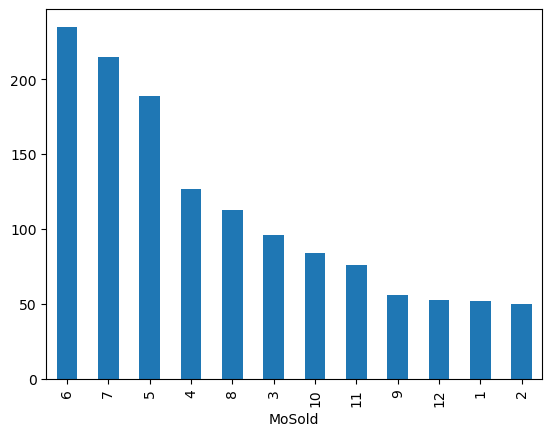

In [45]:
# Lets see whether MoSold gives any significant
housing_df['MoSold'].value_counts().plot.bar()

<Axes: title={'center': 'SalePrice'}, xlabel='MoSold'>

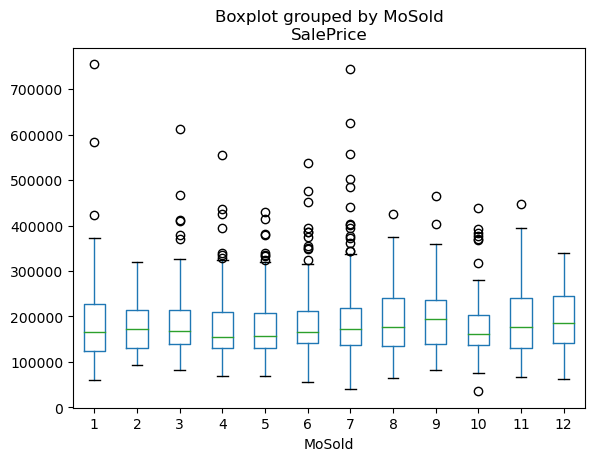

In [46]:
housing_df.boxplot(by ='MoSold', column =['SalePrice'], grid = False) 

#### Observations
 - In 6th month, the number of houses sold is high
 - But when we draw the box plot, we can see that sale price's are around from 100000 to 250000 but some outliers are there. Since we derived the Age of the house and Age of the Garage column so dropping the MoSold column.

In [47]:
# Dropping the MoSold Column
housing_df.drop('MoSold',axis=1, inplace=True)

In [48]:
numeric_df = housing_df.select_dtypes(include=['float64','int64'])
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'AgeOfHouse',
       'AgeOfRemodification'],
      dtype='object')

In [49]:
housing_df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']].corr()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF
BsmtFinSF1,1.000000,-0.065627,-0.551717,0.507038,0.452920,-0.153321
BsmtFinSF2,-0.065627,1.000000,-0.232875,0.081691,0.092315,-0.108858
BsmtUnfSF,-0.551717,-0.232875,1.000000,0.363344,0.317775,-0.017812
TotalBsmtSF,0.507038,0.081691,0.363344,1.000000,0.893812,-0.237083
1stFlrSF,0.452920,0.092315,0.317775,0.893812,1.000000,-0.223865
2ndFlrSF,-0.153321,-0.108858,-0.017812,-0.237083,-0.223865,1.000000


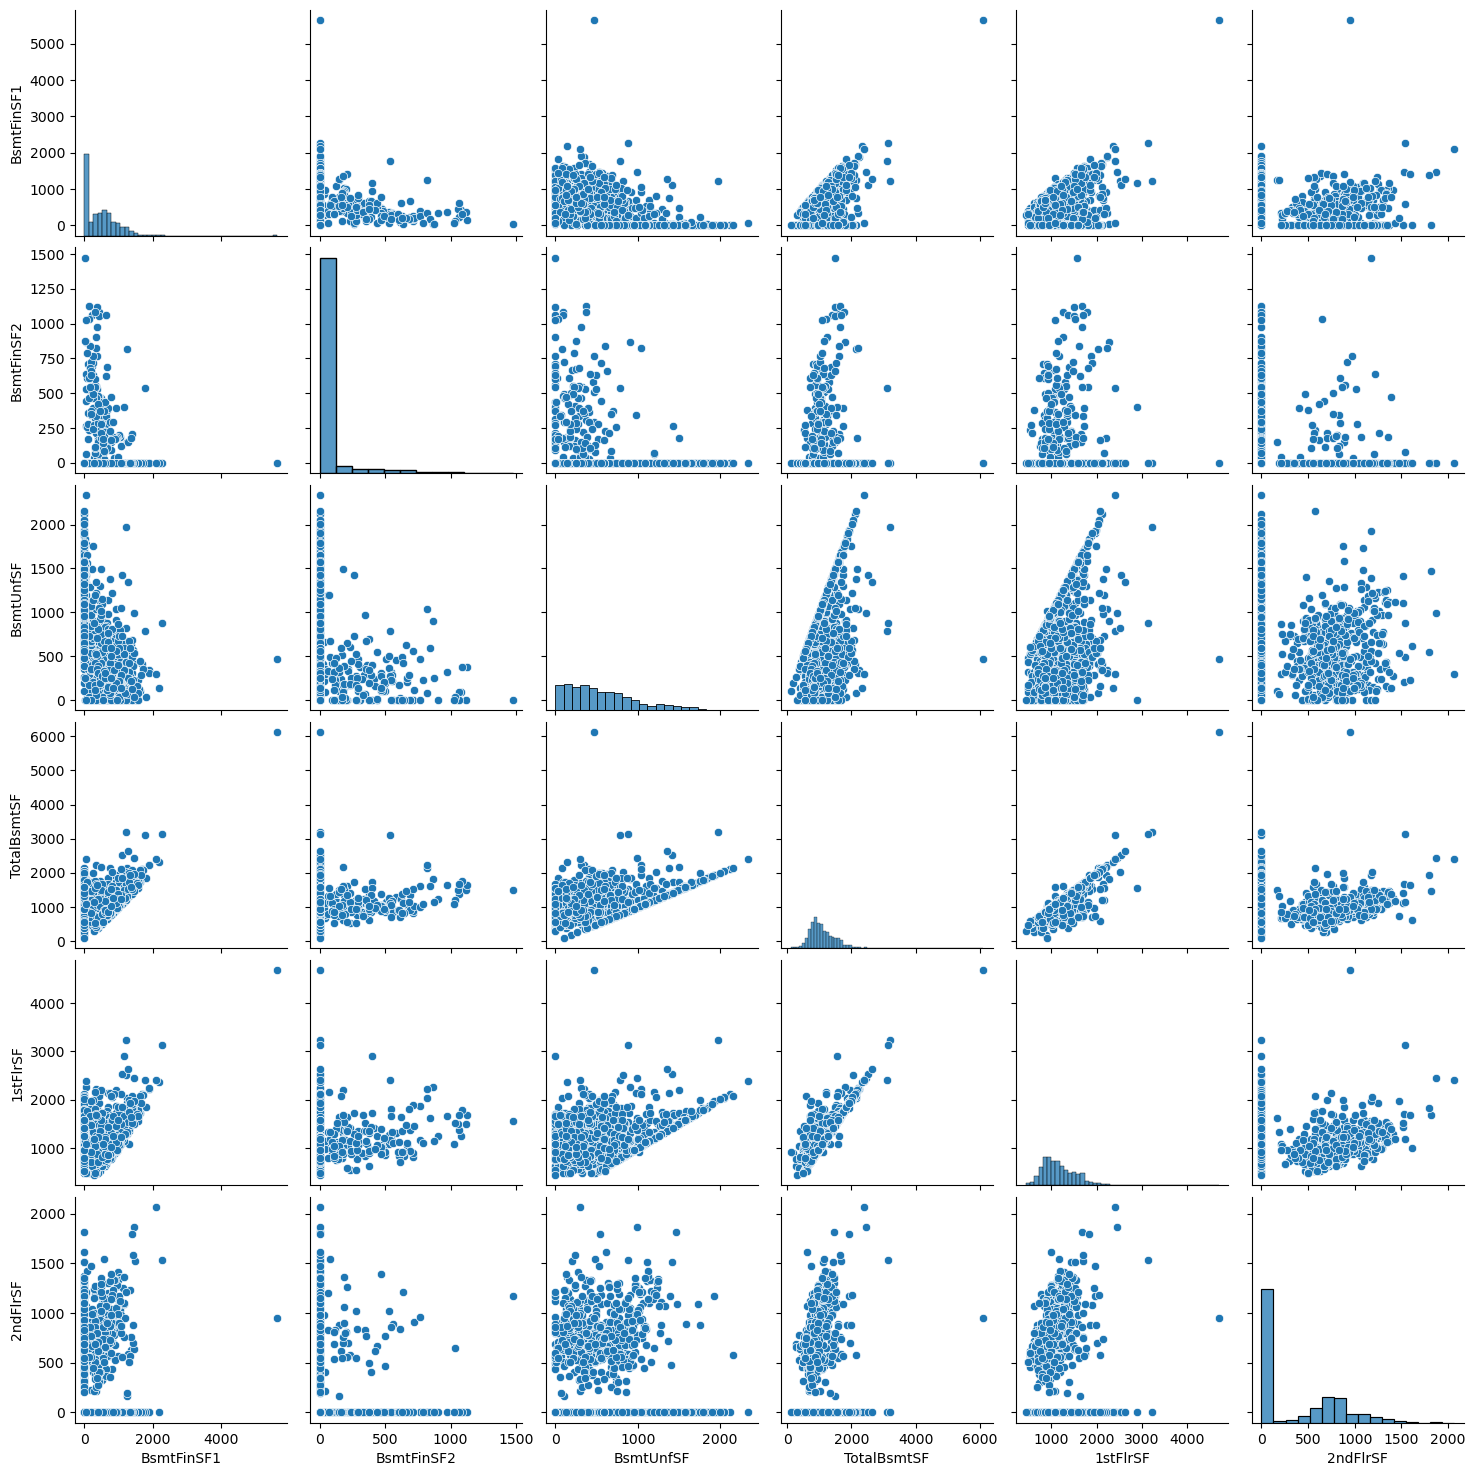

In [50]:
sns.pairplot(housing_df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']])
plt.show()

#### Observation:
 - TotalBsmtSF and 1stFlrSF is highly correlated. Based on correlation value(cut off to drop is 0.7) we can drop the 1stFlrSF.

In [51]:
# dropping the 1stFlrSF
housing_df.drop('1stFlrSF',axis=1,inplace=True)

In [52]:
housing_df[['GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
            'GarageCars','GarageArea']].corr()

,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
GrLivArea,1.000000,0.031455,0.626983,0.414327,0.510122,0.823553,0.460504,0.483797,0.477069
BsmtFullBath,0.031455,1.000000,-0.080878,-0.056215,-0.161907,-0.051366,0.135865,0.132815,0.187564
FullBath,0.626983,-0.080878,1.000000,0.133261,0.356925,0.548309,0.240772,0.511498,0.423173
HalfBath,0.414327,-0.056215,0.133261,1.000000,0.244352,0.355862,0.190942,0.198145,0.127937
BedroomAbvGr,0.510122,-0.161907,0.356925,0.244352,1.000000,0.660236,0.122398,0.117343,0.085679
TotRmsAbvGrd,0.823553,-0.051366,0.548309,0.355862,0.660236,1.000000,0.335824,0.403213,0.366499
Fireplaces,0.460504,0.135865,0.240772,0.190942,0.122398,0.335824,1.000000,0.245182,0.202059
GarageCars,0.483797,0.132815,0.511498,0.198145,0.117343,0.403213,0.245182,1.000000,0.832426
GarageArea,0.477069,0.187564,0.423173,0.127937,0.085679,0.366499,0.202059,0.832426,1.000000


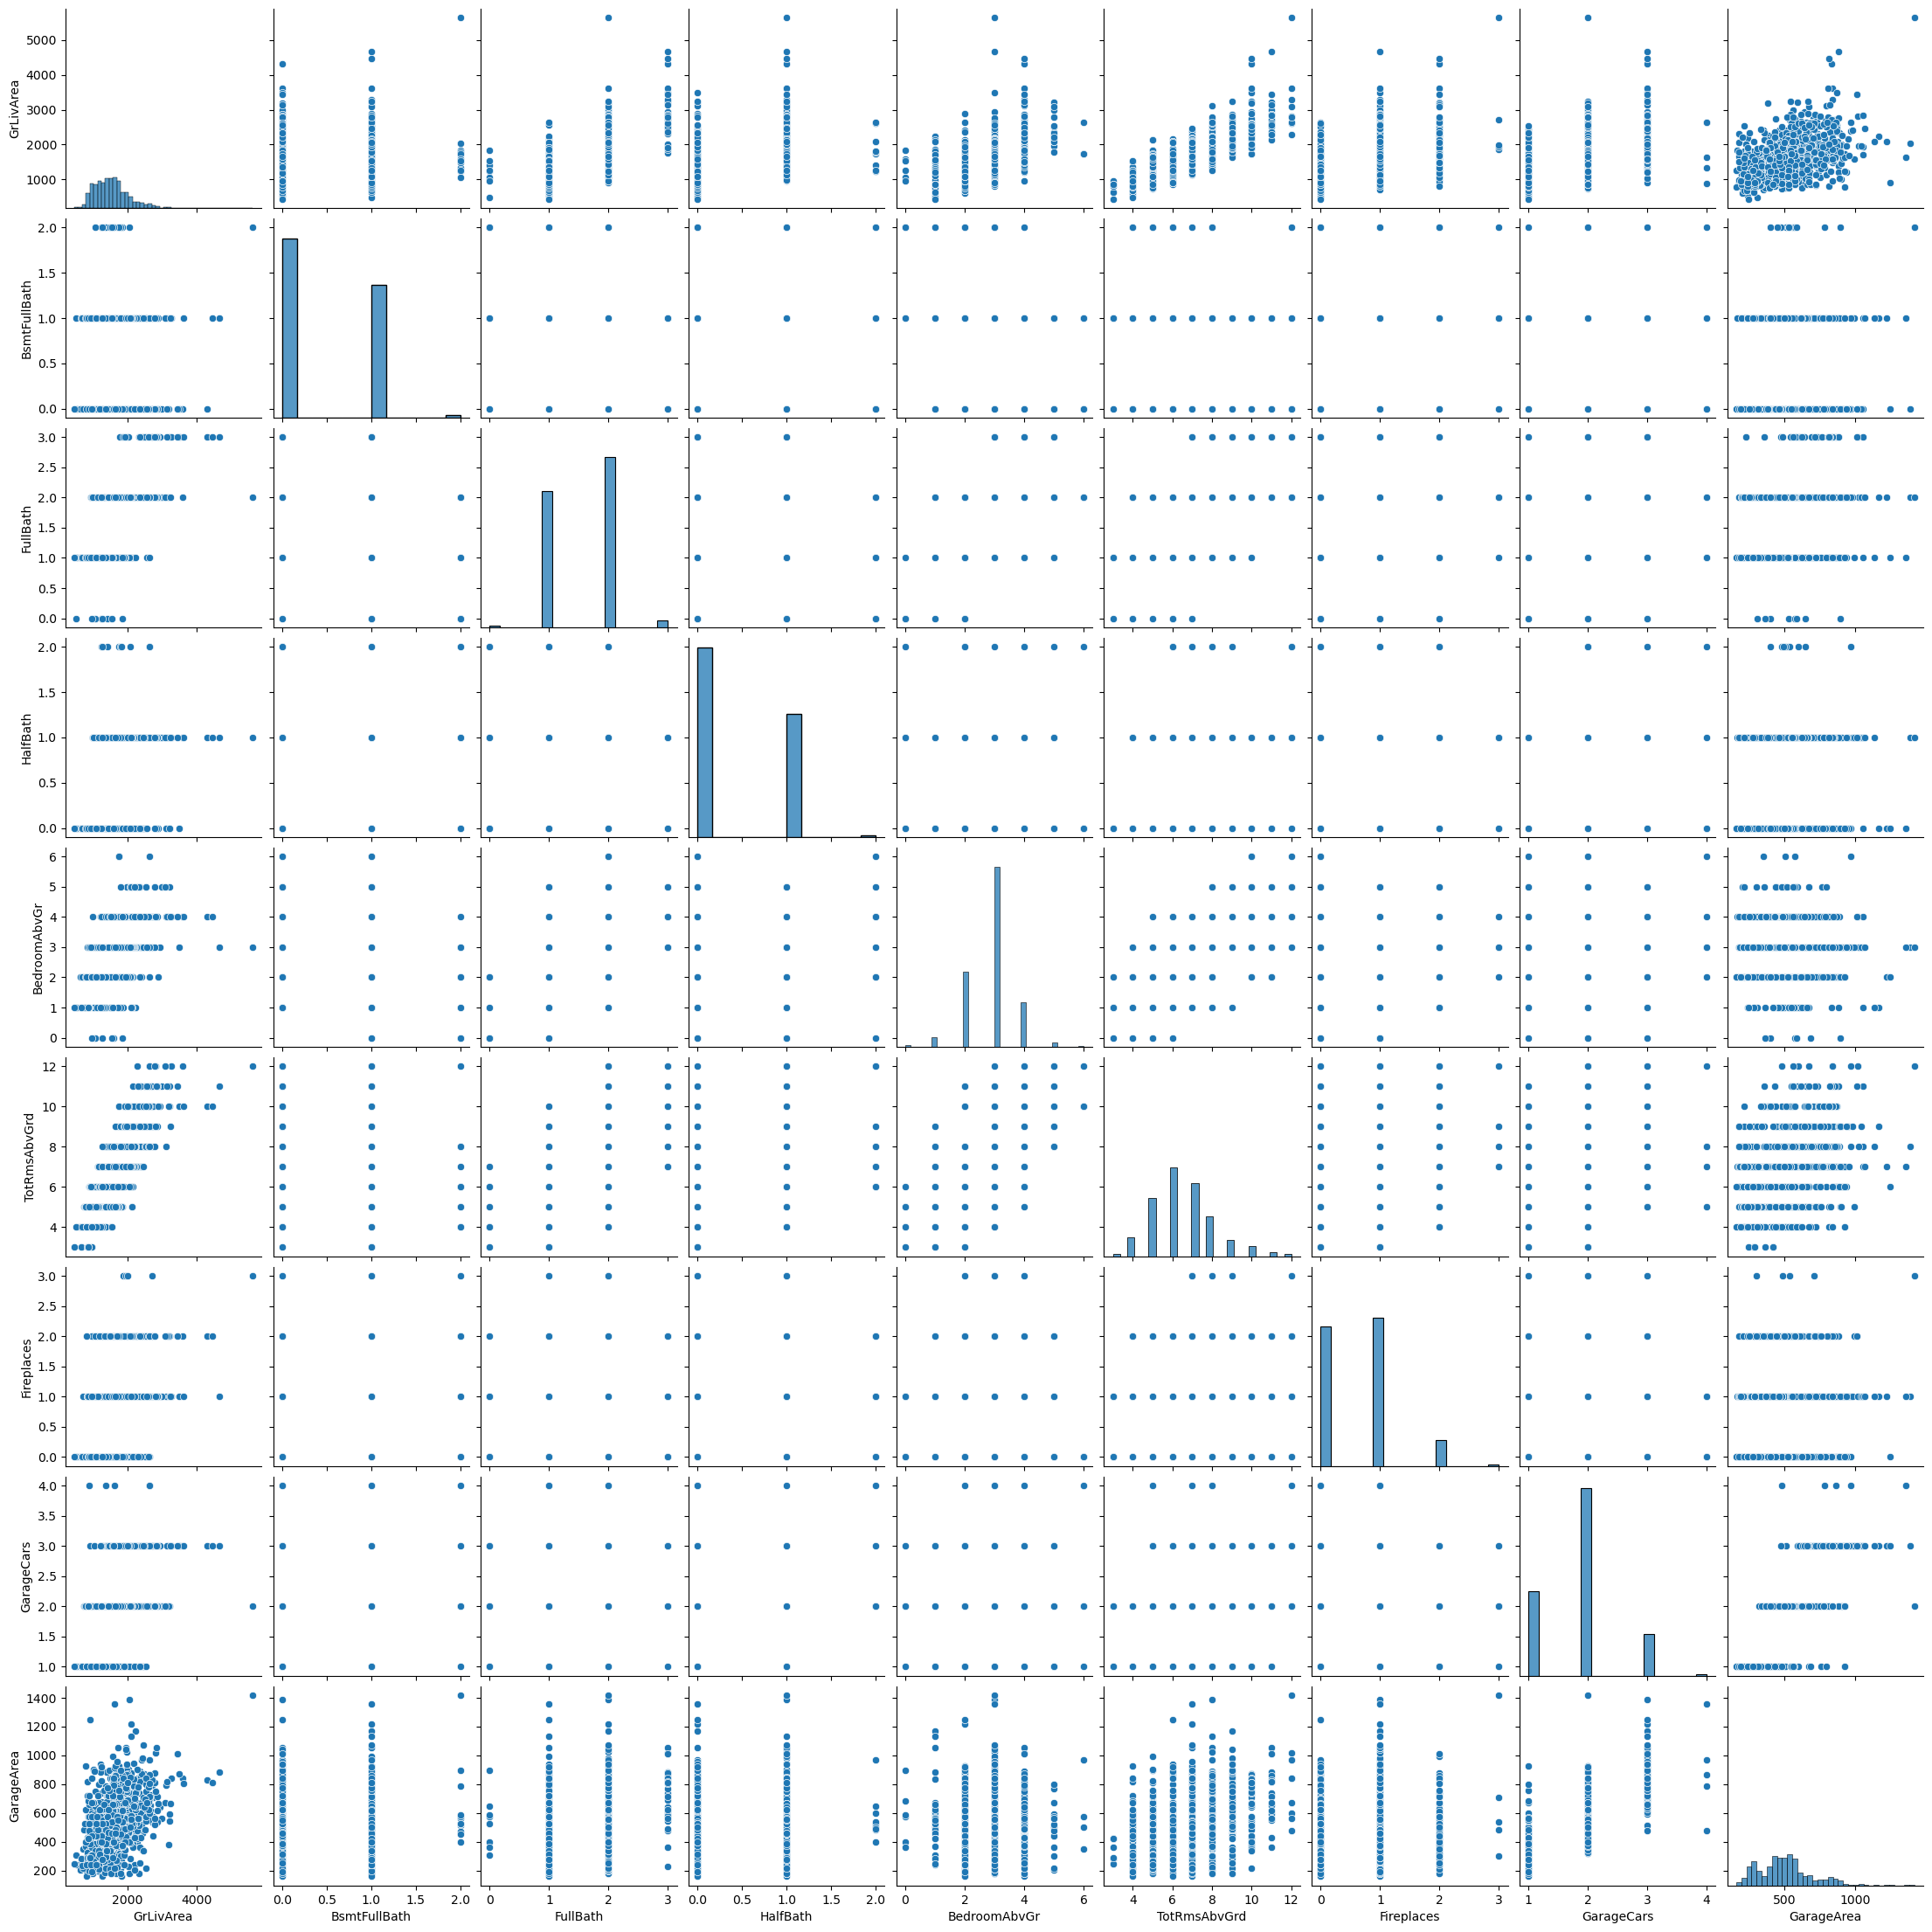

In [53]:
sns.pairplot(housing_df[['GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','GarageArea']])
plt.show()

#### Observations 
    - GarageCars,TotRmsAbvGrd are highly correlated with GarageArea and GrLivArea respectively. 
    - Based on the correlation cutoff dropping the GarageCars,TotRmsAbvGrd features

In [54]:
# GarageArea and GarageCars are highly correlated. If GarageArea is more than the car capacity will be more.
# One feature will be explained by another feature. so dropping the GarageCars
# GrLivArea and TotRmsAbvGrd are highly correlated.
# Here i am considering the cut off for correlation 0.7 if correlation is above 0.7 than i am dropping the columns.

housing_df.drop(['GarageCars','TotRmsAbvGrd'], axis=1, inplace=True)

In [55]:
housing_df[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice', 'AgeOfHouse', 'AgeOfRemodification']].corr()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,AgeOfHouse,AgeOfRemodification
WoodDeckSF,1.000000,0.057862,-0.131625,0.305896,-0.208846,-0.197669
OpenPorchSF,0.057862,1.000000,-0.106038,0.327406,-0.222844,-0.238265
EnclosedPorch,-0.131625,-0.106038,1.000000,-0.127199,0.385139,0.219545
SalePrice,0.305896,0.327406,-0.127199,1.000000,-0.504519,-0.502764
AgeOfHouse,-0.208846,-0.222844,0.385139,-0.504519,1.000000,0.620355
AgeOfRemodification,-0.197669,-0.238265,0.219545,-0.502764,0.620355,1.000000


In [56]:
#mapper functions. some of the categorical columns we can assign nvumerical values as those columns has order
def lotshape_map(lot_shape):
    return lot_shape.map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})

def landslope_map(land_slope):
    return land_slope.map({'Gtl':3,'Mod':2,'Sev':1})

def exterqual_map(exter_qual):
    return exter_qual.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0})

def extercond_map(exter_cond):
    return exter_cond.map({'Gd':4,'Av':3,'Mn':2,'No':1,'No':0})

def garage_map(garage_finish):
    return garage_finish.map({'Fin':3,'RFn':2,'Unf':1})

def livingquaters_map(living_quaters):
    return living_quaters.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No':0})


In [57]:
# need to assign some numerical sequence to some categorical columns
housing_df[['LotShape']] = housing_df[['LotShape']].apply(lotshape_map)

housing_df[['LandSlope']] = housing_df[['LandSlope']].apply(landslope_map)

housing_df[['ExterQual']] = housing_df[['ExterQual']].apply(exterqual_map)

housing_df[['ExterCond']] = housing_df[['ExterCond']].apply(exterqual_map)

housing_df[['BsmtQual']] = housing_df[['BsmtQual']].apply(exterqual_map)

housing_df[['BsmtCond']] = housing_df[['BsmtCond']].apply(exterqual_map)

housing_df[['BsmtExposure']] = housing_df[['BsmtExposure']].apply(extercond_map)

housing_df[['BsmtFinType2']] = housing_df[['BsmtFinType2']].apply(livingquaters_map)

housing_df[['BsmtFinType1']] = housing_df[['BsmtFinType1']].apply(livingquaters_map)

housing_df[['HeatingQC']] = housing_df[['HeatingQC']].apply(exterqual_map)

housing_df[['KitchenQual']] = housing_df[['KitchenQual']].apply(exterqual_map)

housing_df[['FireplaceQu']] = housing_df[['FireplaceQu']].apply(exterqual_map)

housing_df[['GarageFinish']] = housing_df[['GarageFinish']].apply(garage_map)

housing_df[['GarageQual']] = housing_df[['GarageQual']].apply(exterqual_map)

housing_df[['GarageCond']] = housing_df[['GarageCond']].apply(exterqual_map)


In [58]:
numeric_df = housing_df.select_dtypes(include=['float64','int64'])
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'SalePrice', 'AgeOfHouse', 'AgeOfRemodification'],
      dtype='object')

In [59]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1346 non-null   int64  
 1   MSZoning             1346 non-null   object 
 2   LotFrontage          1346 non-null   float64
 3   LotArea              1346 non-null   int64  
 4   LotShape             1346 non-null   int64  
 5   LandContour          1346 non-null   object 
 6   LotConfig            1346 non-null   object 
 7   LandSlope            1346 non-null   int64  
 8   Neighborhood         1346 non-null   object 
 9   Condition1           1346 non-null   object 
 10  BldgType             1346 non-null   object 
 11  HouseStyle           1346 non-null   object 
 12  OverallQual          1346 non-null   int64  
 13  OverallCond          1346 non-null   int64  
 14  RoofStyle            1346 non-null   object 
 15  Exterior1st          1346 non-null   object

In [60]:
numeric_df = housing_df.select_dtypes(include=['float64','int64'])
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'SalePrice', 'AgeOfHouse', 'AgeOfRemodification'],
      dtype='object')

In [61]:
# MasVnrArea is a numerical field so converting into float from object
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].astype('float64')

<Axes: >

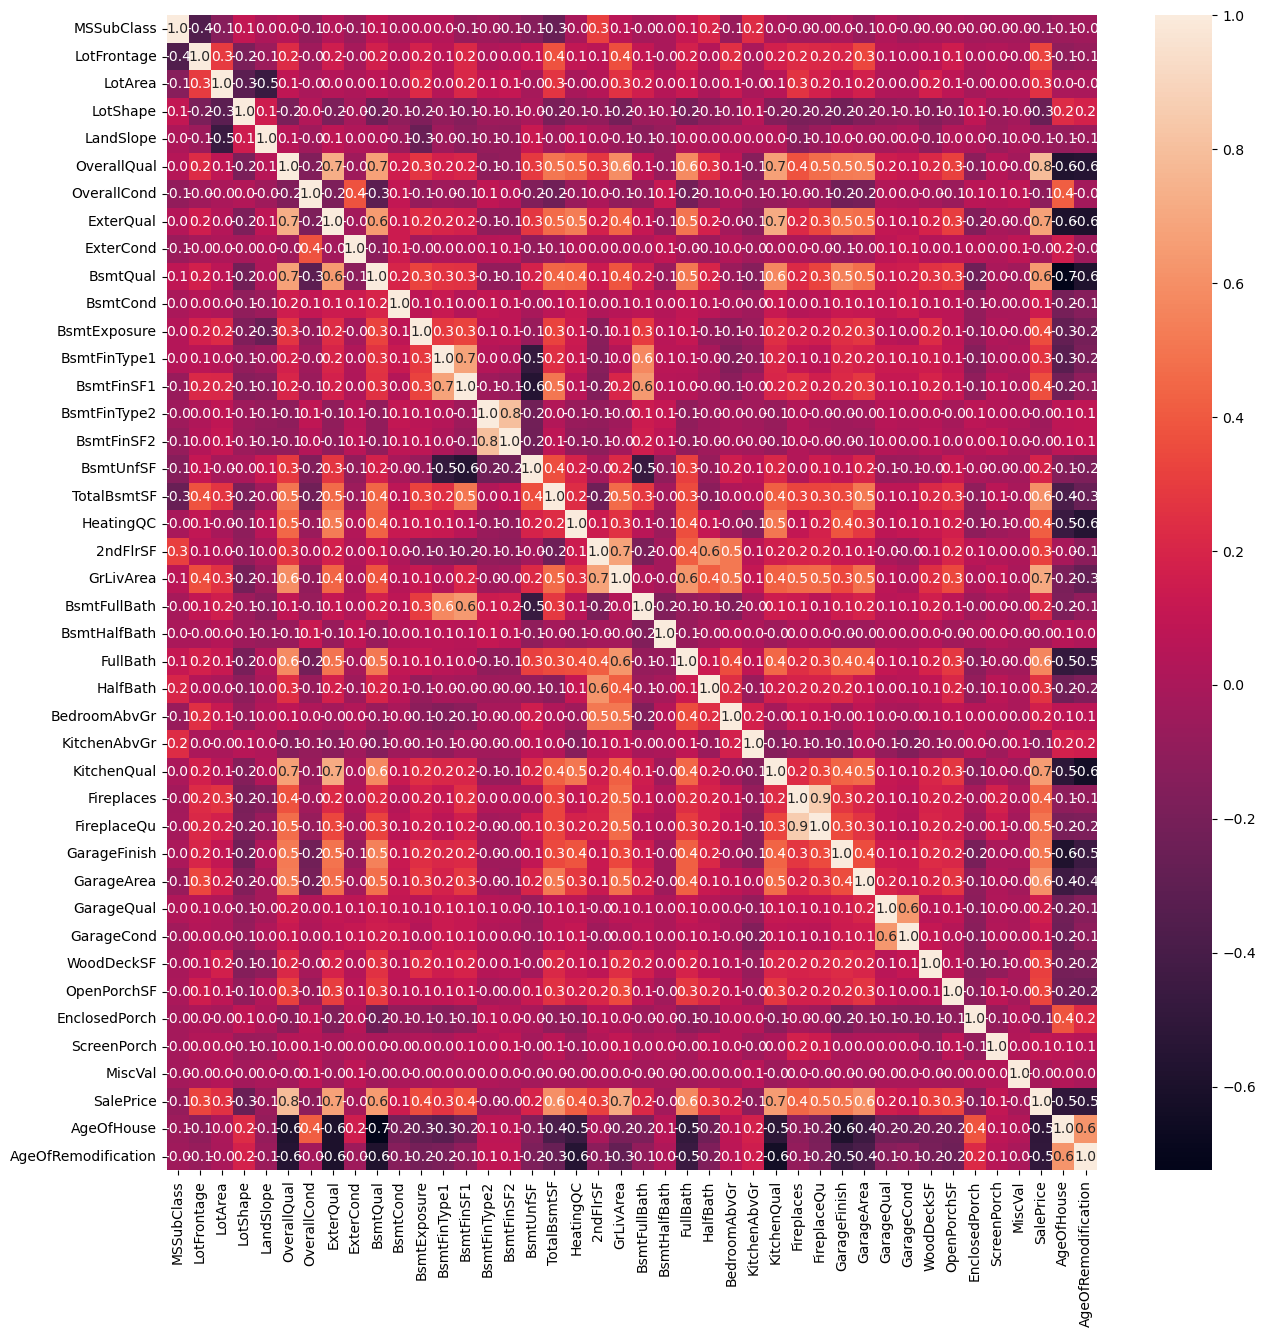

In [62]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(numeric_df.corr(),annot=True, fmt=".1f")

In [63]:
#Based on correlation matrix dropping few of the variables which are highly correlated
housing_df.drop(['BsmtFinSF1','BsmtFinSF2','2ndFlrSF','FireplaceQu','BsmtQual','KitchenQual'],axis=1,inplace=True)


In [64]:
categorical_df = housing_df.select_dtypes(include=['object'])
categorical_df.head()

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,No,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,No,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Y,WD,Abnorml
4,RL,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal


In [65]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1346 non-null   object
 1   LandContour    1346 non-null   object
 2   LotConfig      1346 non-null   object
 3   Neighborhood   1346 non-null   object
 4   Condition1     1346 non-null   object
 5   BldgType       1346 non-null   object
 6   HouseStyle     1346 non-null   object
 7   RoofStyle      1346 non-null   object
 8   Exterior1st    1346 non-null   object
 9   Exterior2nd    1346 non-null   object
 10  MasVnrType     1346 non-null   object
 11  Foundation     1346 non-null   object
 12  Heating        1346 non-null   object
 13  CentralAir     1346 non-null   object
 14  Electrical     1346 non-null   object
 15  Functional     1346 non-null   object
 16  GarageType     1346 non-null   object
 17  PavedDrive     1346 non-null   object
 18  SaleType       1346 non-null   ob

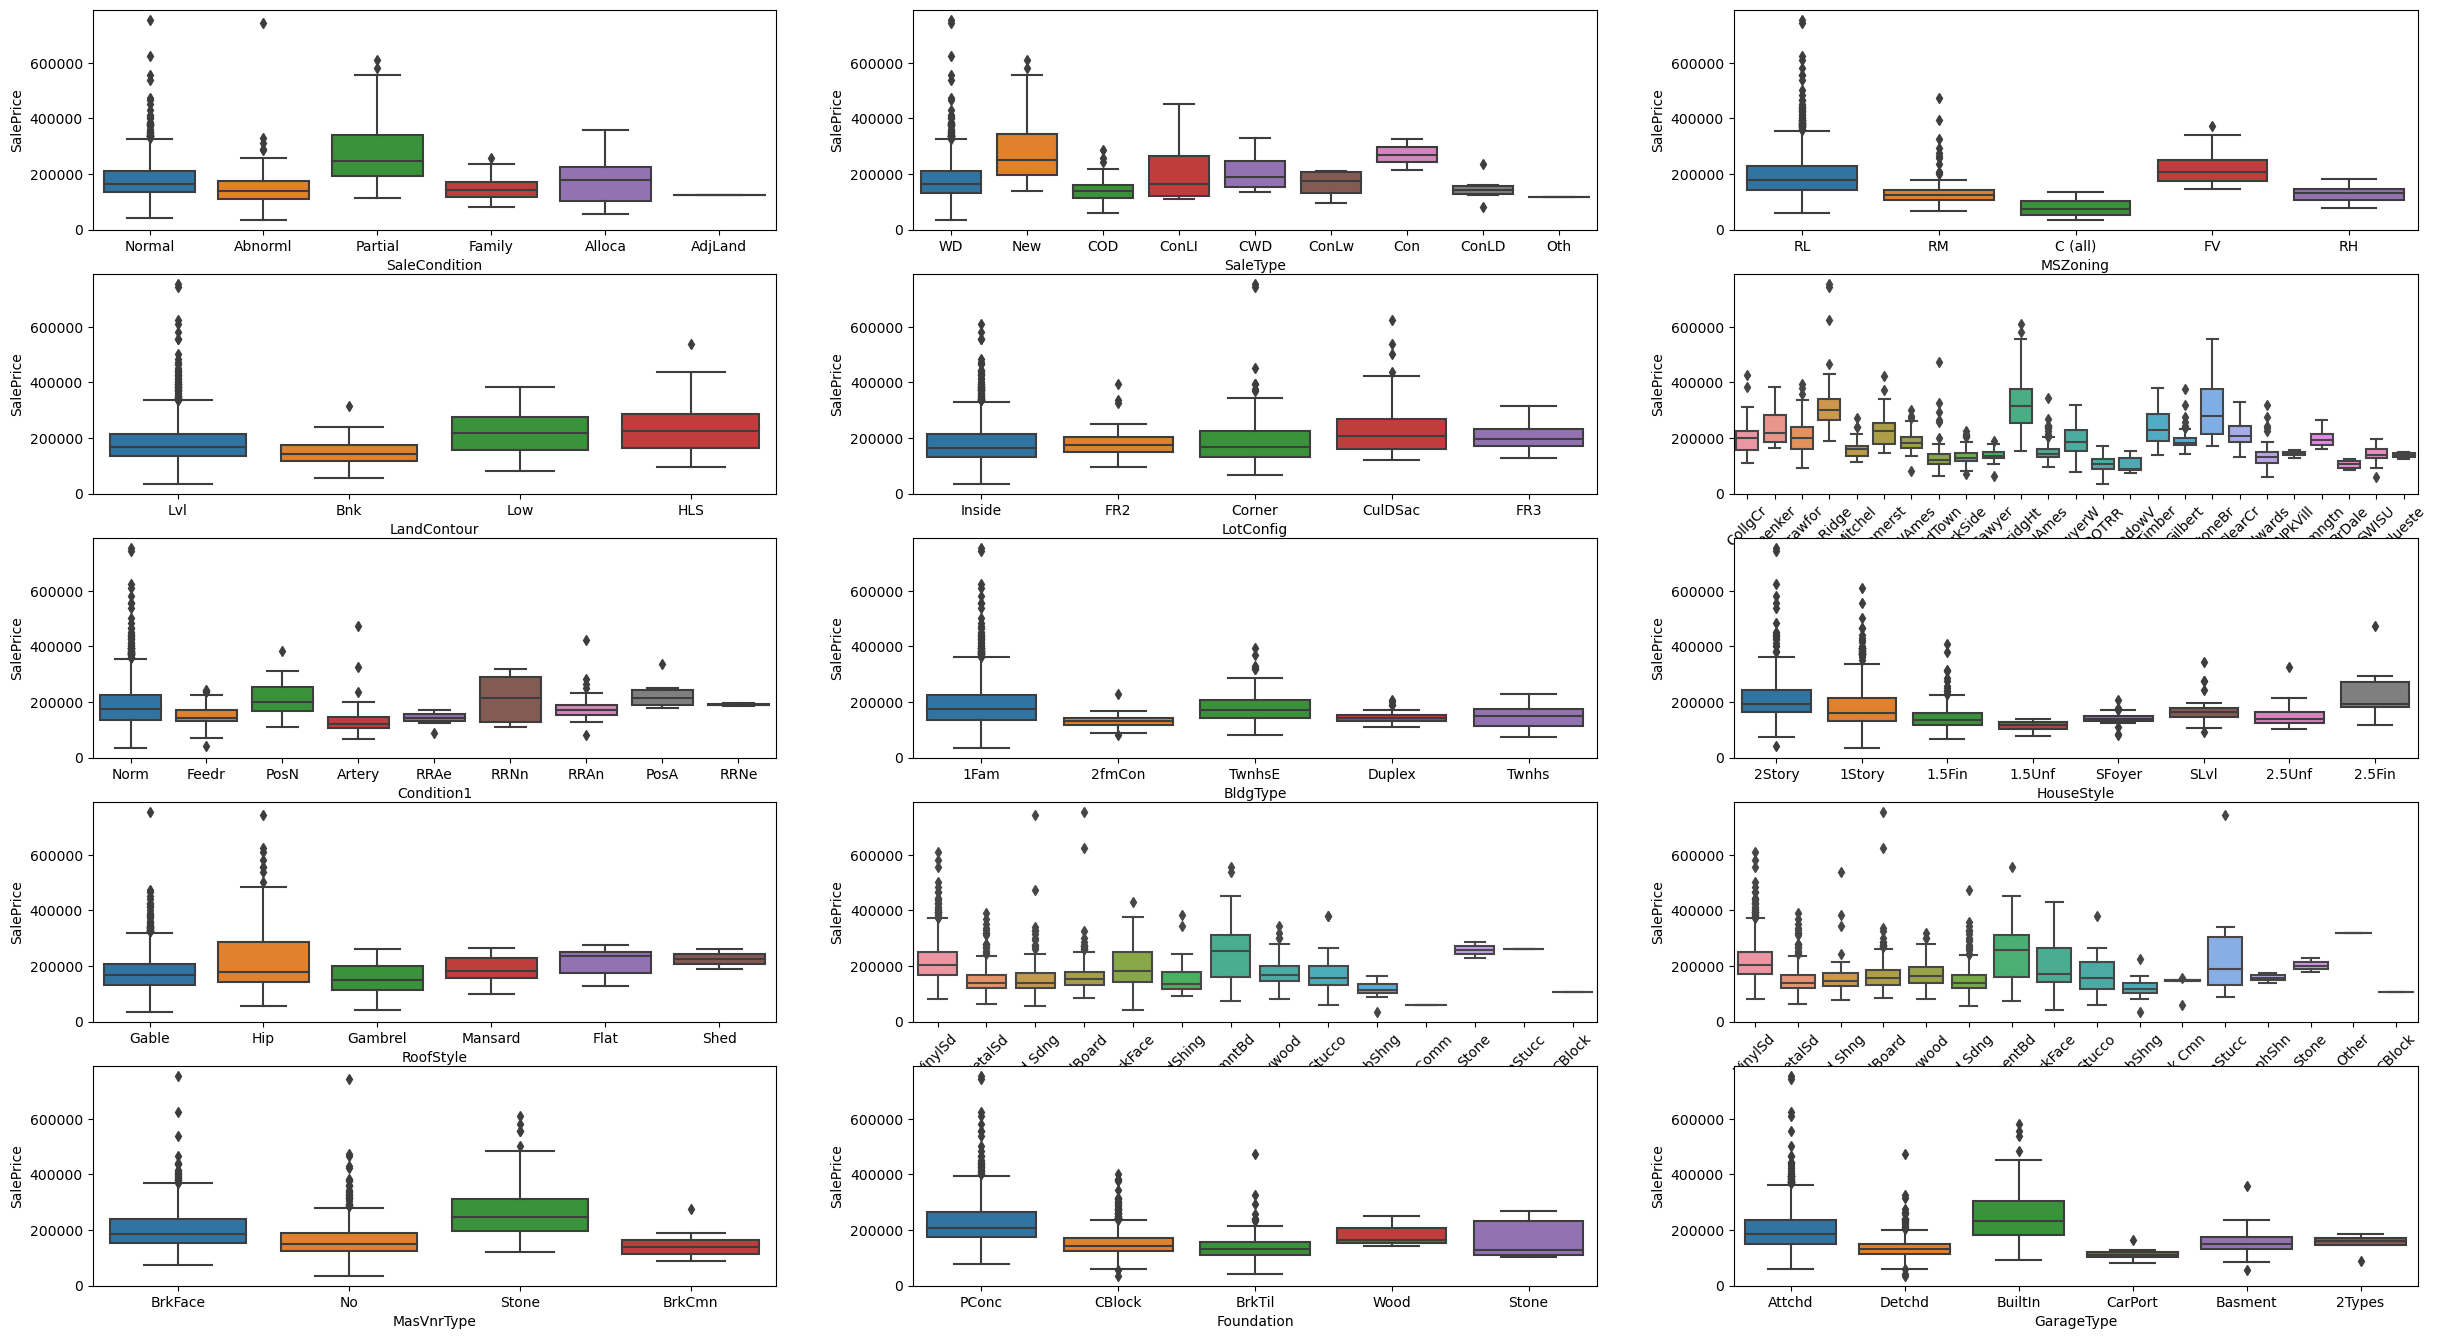

In [66]:
plt.figure(figsize=(30, 20))
plt.subplot(6,3,1)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,2)
mnthplot = sns.boxplot(x = 'SaleType', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,3)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,4)
weekplot = sns.boxplot(x = 'LandContour', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,5)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,6)
n_plot = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,7)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,8)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,9)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,10)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,11)
e_1st = sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,12)
e_plot = sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,13)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,14)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing_df)
plt.subplot(6,3,15)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing_df)
n_plot.set_xticklabels(n_plot.get_xticklabels(), rotation=45)
e_plot.set_xticklabels(e_plot.get_xticklabels(), rotation=45)
e_1st.set_xticklabels(e_1st.get_xticklabels(), rotation=45)
plt.show()

#### Observations from Categorical features
    - SaleCondition: Partial sale condition type has high saleprice then followed by Alloca and etc
    - Sale Type: New houses have high sale price followed by Contract Low Interest sale and etc
    - MSZoning: Floating Village Residential has high sale price than other types
    - High sale price properties: 
        - Hillside Land Contour, Builtin GarageType, Poured Contrete (followed by stone), Stone Masonry veneer type, CulDSac Lot config, Single-family Detached, Within 200' of North-South Railroad
      

## Step 3: Data Preparation

Let's now prepare the data and build the model.

In [67]:
# creating dummy variables for categorical variables

# subset all categorical variables

categorical_df = housing_df.select_dtypes(include=['object'])
categorical_df.head()


,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,No,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,No,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Y,WD,Abnorml
4,RL,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,WD,Normal


In [68]:
categorical_df.columns

Index(['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [69]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(categorical_df, drop_first=True,dtype=np.uint8)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [70]:
# drop categorical variables 
housing_df = housing_df.drop(list(categorical_df.columns), axis=1)

In [71]:
# concat dummy variables with X
housing_df = pd.concat([housing_df, house_dummies], axis=1)

In [72]:
housing_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,4,3,7,5,196.0,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,4,3,6,8,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,3,3,7,5,162.0,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,3,3,7,5,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,3,3,8,5,350.0,4,3,...,0,0,0,0,1,0,0,0,1,0


In [73]:
housing_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=165)

In [74]:
# split into X and y
y = housing_df.pop('SalePrice')

X = housing_df

In [75]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=164)

In [76]:
X.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,...,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03,1.346000e+03
mean,-6.400691e-17,1.319730e-18,-3.431299e-17,-3.114563e-16,7.957973e-16,-8.974165e-17,2.863815e-16,-6.334705e-17,3.378509e-16,-3.701843e-16,...,-1.055784e-17,-1.319730e-17,-3.563272e-17,1.847622e-17,-1.662860e-16,1.055784e-17,5.278921e-18,2.903406e-17,1.491295e-16,-7.918381e-18
std,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,...,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00,1.000372e+00
min,-8.758686e-01,-2.232533e+00,-9.121871e-01,-4.364668e+00,-6.980251e+00,-3.187794e+00,-3.333372e+00,-5.924274e-01,-2.480947e+00,-3.280403e+00,...,-5.459511e-02,-5.459511e-02,-3.128566e-01,-2.726709e-02,-2.520950e+00,-2.726709e-02,-7.732447e-02,-1.228127e-01,-2.157652e+00,-3.171315e-01
25%,-8.758686e-01,-4.718763e-01,-2.873001e-01,-9.756613e-01,2.275878e-01,-9.247293e-01,-5.494721e-01,-5.924274e-01,-7.480179e-01,-2.787562e-01,...,-5.459511e-02,-5.459511e-02,-3.128566e-01,-2.726709e-02,3.966758e-01,-2.726709e-02,-7.732447e-02,-1.228127e-01,4.634668e-01,-3.171315e-01
50%,-1.476912e-01,-6.557098e-02,-1.080689e-01,7.188420e-01,2.275878e-01,-1.703744e-01,-5.494721e-01,-5.924274e-01,-7.480179e-01,-2.787562e-01,...,-5.459511e-02,-5.459511e-02,-3.128566e-01,-2.726709e-02,3.966758e-01,-2.726709e-02,-7.732447e-02,-1.228127e-01,4.634668e-01,-3.171315e-01
75%,3.377603e-01,4.310244e-01,1.012683e-01,7.188420e-01,2.275878e-01,5.839805e-01,3.784946e-01,3.445107e-01,9.849117e-01,-2.787562e-01,...,-5.459511e-02,-5.459511e-02,-3.128566e-01,-2.726709e-02,3.966758e-01,-2.726709e-02,-7.732447e-02,-1.228127e-01,4.634668e-01,-3.171315e-01
max,3.250470e+00,1.094982e+01,1.981517e+01,7.188420e-01,2.275878e-01,2.847045e+00,3.162395e+00,8.047924e+00,2.717841e+00,5.724537e+00,...,1.831666e+01,1.831666e+01,3.196352e+00,3.667424e+01,3.966758e-01,3.667424e+01,1.293252e+01,8.142481e+00,4.634668e-01,3.153266e+00


In [77]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [78]:
numeric_df = housing_df.select_dtypes(include=['float64','int64'])
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'AgeOfHouse',
       'AgeOfRemodification'],
      dtype='object')

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [80]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 40 features
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=40)

# Fit with 50 features
rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True False  True False False  True  True  True  True False False  True
 False False  True  True False  True  True False False False False False
  True False  True False False False False False  True False False False
  True False  True  True  True  True  True False False False False False
 False False False False False  True False False False False  True False
 False  True  True  True False False False False  True False False  True
 False False  True False False False False False False False False False
  True False False False False False False False False False False False
 False False  True False False False False False  True  True  True False
 False False  True False  True False  True False False False False False
  True  True False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False]
[

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 17),
 ('LotArea', True, 1),
 ('LotShape', False, 50),
 ('LandSlope', False, 43),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 66),
 ('BsmtCond', False, 103),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 37),
 ('BsmtFinType2', False, 113),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 82),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 51),
 ('FullBath', False, 9),
 ('HalfBath', False, 15),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 48),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 53),
 ('GarageArea', True, 1),
 ('GarageQual', False, 60),
 ('GarageCond', False, 79),
 ('WoodDeckSF', False, 62),
 ('OpenPorchSF', False, 88),
 ('EnclosedPorch', False, 99),
 ('ScreenPorch', True, 1),
 ('MiscVal', False, 96),
 ('AgeOfHouse', False, 41),
 ('AgeOfRemodification', False, 67),
 ('MSZ

In [82]:
col = X_train.columns[rfe.support_]
col.shape

(40,)

In [83]:
X_train_rfe = X_train[col]
X_train_rfe.shape

(942, 40)

In [84]:
y_train.shape

(942,)

In [85]:
X_train_rfe.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'Fireplaces', 'GarageArea', 'ScreenPorch',
       'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Edwards',
       'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Condition1_Feedr',
       'Condition1_PosN', 'HouseStyle_1Story', 'Exterior1st_CemntBd',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_PConc',
       'SaleType_New'],
      dtype='object')

In [86]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [87]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

187037.6724630169
[-9569.25059333  3694.49115593 19629.77338234  6388.82406771
  3719.37180546  5269.30602184  8812.68559514 -4354.56193674
 -4670.23061147 33034.40943954  4462.11794435  3868.76062741
  4508.74858265  3616.11762756  5799.14047209  5732.64800509
  2482.59012461  5438.56929784  3938.22111754  7613.91127365
 -3481.98453155 -3313.69782264  9020.73311273 12674.82623523
 -2853.81827293  5799.10736123 -3639.98198086 -3501.97833682
  7685.19306916 10173.58282279 -3897.04683162 -8061.73836888
 -4329.23625031  3208.22516073 -8194.64546059  3623.99669747
  9943.76426285  4200.9274341   3579.25699551  3618.44477697]


In [88]:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [89]:
from sklearn.metrics import r2_score, mean_squared_error

In [90]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 value for Training Data:')
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 value for Test Data:')
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS for Train Data:')
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test Data:')
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train Data:')
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test Data:')
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 value for Training Data:
0.8497135774301376
R2 value for Test Data:
0.822504723871849
RSS for Train Data:
928299125821.1769
RSS for Test Data:
395868291555.761
MSE for Train Data:
985455547.5808672
MSE for Test Data:
979872008.8013886


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [91]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [93]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col], y_train)
print(ridge.coef_)

[-8178.45406648  3859.79789841 17734.20162181  6195.65566115
  4446.7089303   7167.02487071  7201.42006623 -3823.14359615
  1532.41947424 24200.28210746  3721.14958883  5194.37955456
  6115.74366772  3663.01743588  3215.30334913  2814.57954392
 -1039.30302508  3665.16168604  2204.95523796  4476.35416439
 -3643.75500553 -3049.16927531  8679.40516285 10670.8339037
 -2020.53619799  5494.76221195 -3211.47018036 -2666.43751188
  2208.16771543  3229.05510765 -3513.72832819  -143.51987452
 -1952.80455963  2899.85231233  -962.17617471  3047.5169397
  2740.63339889  2133.86176117  3791.25403068  3345.92471146]


In [94]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 value for Training Data:')
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 value for Test Data:')
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS for Train Data:')
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test Data:')
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train Data:')
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test Data:')
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 value for Training Data:
0.8436139117704872
R2 value for Test Data:
0.843468646608507
RSS for Train Data:
965975944543.9248
RSS for Test Data:
349112386502.4008
MSE for Train Data:
1025452170.4287949
MSE for Test Data:
864139570.550497


## Lasso Regression

In [95]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [97]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col], y_train) 

Lasso(alpha=1000)

In [98]:
lasso.coef_

array([-8507.48578706,  3705.05389807, 21172.29455883,  4815.10062289,
        2820.95382263,  7196.61380209,  7952.58150179, -3490.46616784,
           0.        , 27787.26497998,  3742.31952461,  3753.9855742 ,
        5163.76618885,  2821.85406658,  1217.23527564,     0.        ,
       -2122.11086509,  1395.06893828,   147.64377063,  1876.74111168,
       -2865.37788395, -1388.25868272,  8464.11440511, 10879.07873548,
       -2108.26111174,  4866.84131926, -2447.23213137, -2418.22267071,
        3292.45533173,  1263.44714787, -3331.56446053,     0.        ,
        -249.07375713,  1431.60976021,     0.        ,  1980.05735377,
        1118.92775985,    -0.        ,  2944.3027231 ,  2762.03690104])

In [99]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 value for Training Data:')
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 value for Test Data:')
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS for Train Data:')
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test Data:')
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train Data:')
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test Data:')
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 value for Training Data:
0.841098835007602
R2 value for Test Data:
0.8429191268238245
RSS for Train Data:
981511237223.3032
RSS for Test Data:
350337982265.19324
MSE for Train Data:
1041943988.5597699
MSE for Test Data:
867173223.4286962


In [100]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.497136e-01,8.436139e-01,8.410988e-01
1,R2 Score (Test),8.225047e-01,8.434686e-01,8.429191e-01
2,RSS (Train),9.282991e+11,9.659759e+11,9.815112e+11
3,RSS (Test),3.958683e+11,3.491124e+11,3.503380e+11
4,RMSE (Train),3.139197e+04,3.202268e+04,3.227916e+04
5,RMSE (Test),3.130291e+04,2.939625e+04,2.944781e+04


## Lets observe the changes in the coefficients after regularization

In [101]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [102]:
betas.rows = X_train_rfe.columns

In [103]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [104]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
MSSubClass,-9569.250593,-8178.454066,-8507.485787
LotArea,3694.491156,3859.797898,3705.053898
OverallQual,19629.773382,17734.201622,21172.294559
OverallCond,6388.824068,6195.655661,4815.100623
MasVnrArea,3719.371805,4446.708930,2820.953823
ExterQual,5269.306022,7167.024871,7196.613802
BsmtExposure,8812.685595,7201.420066,7952.581502
BsmtUnfSF,-4354.561937,-3823.143596,-3490.466168
TotalBsmtSF,-4670.230611,1532.419474,0.000000
GrLivArea,33034.409440,24200.282107,27787.264980


#### Double the alpha - Ridge

In [105]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 200
ridge_new = Ridge(alpha=alpha)

ridge_new.fit(X_train[col], y_train)
print(ridge.coef_)

[-8178.45406648  3859.79789841 17734.20162181  6195.65566115
  4446.7089303   7167.02487071  7201.42006623 -3823.14359615
  1532.41947424 24200.28210746  3721.14958883  5194.37955456
  6115.74366772  3663.01743588  3215.30334913  2814.57954392
 -1039.30302508  3665.16168604  2204.95523796  4476.35416439
 -3643.75500553 -3049.16927531  8679.40516285 10670.8339037
 -2020.53619799  5494.76221195 -3211.47018036 -2666.43751188
  2208.16771543  3229.05510765 -3513.72832819  -143.51987452
 -1952.80455963  2899.85231233  -962.17617471  3047.5169397
  2740.63339889  2133.86176117  3791.25403068  3345.92471146]


In [106]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_new.predict(X_train_rfe)
y_pred_test = ridge_new.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 value for Training Data:')
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 value for Test Data:')
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS for Train Data:')
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test Data:')
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train Data:')
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test Data:')
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

R2 value for Training Data:
0.8367645933158293
R2 value for Test Data:
0.8458173754878819
RSS for Train Data:
1008283268287.5193
RSS for Test Data:
343874008844.7636
MSE for Train Data:
1070364403.7022498
MSE for Test Data:
851173289.2197119


#### Double the alpha - Lasso

In [107]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =2000

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_rfe, y_train) 

Lasso(alpha=2000)

In [108]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_new.predict(X_train_rfe)
y_pred_test = lasso_new.predict(X_test_rfe)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 value for Training Data:')
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 value for Test Data:')
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS for Train Data:')
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test Data:')
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train Data:')
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test Data:')
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

R2 value for Training Data:
0.8285105935604007
R2 value for Test Data:
0.8379341796376484
RSS for Train Data:
1059267120497.6594
RSS for Test Data:
361455926185.35974
MSE for Train Data:
1124487389.0633328
MSE for Test Data:
894692886.5974251


In [109]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )


rg_metric_new = pd.Series(metric4, name = 'Ridge Regression Double Alpha')
ls_metric_new = pd.Series(metric5, name = 'Lasso Regression Double Alpha')

final_metric = pd.concat([lr_metric,rg_metric,ls_metric,rg_metric_new, ls_metric_new], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Regression Double Alpha,Lasso Regression Double Alpha
0,R2 Score (Train),8.497136e-01,8.436139e-01,8.410988e-01,8.367646e-01,8.285106e-01
1,R2 Score (Test),8.225047e-01,8.434686e-01,8.429191e-01,8.458174e-01,8.379342e-01
2,RSS (Train),9.282991e+11,9.659759e+11,9.815112e+11,1.008283e+12,1.059267e+12
3,RSS (Test),3.958683e+11,3.491124e+11,3.503380e+11,3.438740e+11,3.614559e+11
4,RMSE (Train),3.139197e+04,3.202268e+04,3.227916e+04,3.271642e+04,3.353338e+04
5,RMSE (Test),3.130291e+04,2.939625e+04,2.944781e+04,2.917487e+04,2.991142e+04


In [110]:
beta_new = pd.DataFrame(index=X_train_rfe.columns)

In [111]:
beta_new.rows = X_train_rfe.columns

In [112]:
beta_new['Ridge'] = ridge_new.coef_
beta_new['Lasso'] = lasso_new.coef_

In [113]:
pd.set_option('display.max_rows', None)
beta_new.head(100)

,Ridge,Lasso
MSSubClass,-6964.181574,-7480.545643
LotArea,3891.025572,3300.561078
OverallQual,16442.247308,22983.287763
OverallCond,5754.552213,2934.321164
MasVnrArea,4848.591786,2222.547123
ExterQual,7864.221957,8676.448489
BsmtExposure,6473.049240,7453.509460
BsmtUnfSF,-3103.935493,-1388.073628
TotalBsmtSF,3616.987241,0.000000
GrLivArea,20455.267941,25045.538089


### Dropping 5 important variable


In [114]:
# Dropping the top 5 important variable from above Lasso Model
new_train_col = X_train_rfe.drop(['MSSubClass','Neighborhood_NoRidge','Neighborhood_NridgHt','OverallQual','GrLivArea'],axis=1)

new_test_col = X_test_rfe.drop(['MSSubClass','Neighborhood_NoRidge','Neighborhood_NridgHt','OverallQual','GrLivArea'],axis=1)

In [115]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(new_train_col, y_train) 

Lasso(alpha=1000)

In [116]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(new_train_col)
y_pred_test = lasso.predict(new_test_col)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 value for Training Data:')
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 value for Test Data:')
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS for Train Data:')
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS for Test Data:')
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train Data:')
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test Data:')
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 value for Training Data:
0.7340051875771125
R2 value for Test Data:
0.7749066369774897
RSS for Train Data:
1643014369647.062
RSS for Test Data:
502026459543.2199
MSE for Train Data:
1744176613.2134416
MSE for Test Data:
1242639751.3446038


In [117]:
lasso.coef_

array([ 4026.70286056,  8560.86983387, 10582.16929725, 20760.50484878,
        3724.50055529, -1930.37439374, 17604.12087972,  1057.77354335,
       11910.50469246, 15260.27622166,  3515.36400999,     0.        ,
        4466.92831377, -2204.16090536,   866.5201807 ,    -0.        ,
         255.44250167, -4837.48558246, -3371.79738922,    -0.        ,
        5086.30042578, -3034.17776443,   -92.13710793, -9263.99975022,
         860.95653204, -3170.41325995,     0.        ,     0.        ,
        3100.94428014,     0.        ,  3383.05591475,  2757.32503417,
        1191.8793487 ,  8354.28304993,  2844.4887303 ])

In [118]:
beta1 = pd.DataFrame(index=new_train_col.columns)

In [119]:
beta1['Lasso'] = lasso.coef_
beta1.head(100)

,Lasso
LotArea,4026.702861
OverallCond,8560.869834
MasVnrArea,10582.169297
ExterQual,20760.504849
BsmtExposure,3724.500555
BsmtUnfSF,-1930.374394
TotalBsmtSF,17604.120880
BsmtFullBath,1057.773543
Fireplaces,11910.504692
GarageArea,15260.276222
